# Amazon cell phone review NLP (sentiment analysis) 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
# Load datasets
import pandas as pd
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

In [6]:
#  Items overview
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(items.shape))
items.head()

The dataset contains  720 rows and  10 variables.


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [7]:
items.describe(include="all")

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720,720,720.000000,720,720.000000,720.000000,720.000000
unique,720,10,718,720,679,NaN,720,NaN,NaN,NaN
top,B07QFS3L4G,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",https://www.amazon.com/Straight-Samsung-Galaxy...,https://m.media-amazon.com/images/I/817r8IrEN5...,NaN,https://www.amazon.com/product-reviews/B074VDZZKW,NaN,NaN,NaN
freq,1,346,2,1,3,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.713750,NaN,105.679167,234.948931,63.690778
std,NaN,NaN,NaN,NaN,NaN,0.716014,NaN,167.601101,200.008441,172.405370
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,7.000000,97.512500,0.000000
50%,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,32.000000,188.975000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,122.250000,336.725000,0.000000


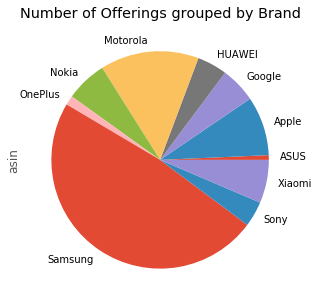

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# Brand distribution
ax = items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Number of Offerings grouped by Brand")
plt.show()

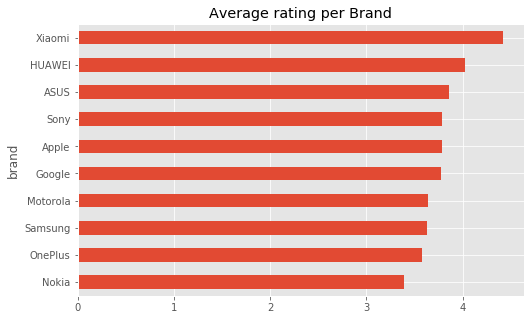

In [9]:
ax = items.groupby("brand").mean()["rating"].sort_values().plot(kind="barh",
                                                                figsize=(8,5), 
                                                                title="Average rating per Brand")
plt.show()

Samsung and Apple are most rated brands, while Xiaomi has the highest average rating. Hence we will look deep into these three brands later.

In [16]:
# Add posivity label
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

# Text Cleaning

In [18]:
# Preprocess review text
# Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = reviews["brand"].unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")


'love reading book'

In [19]:
#Apply preprocess function to the dataframe
reviews["body"] = reviews["body"].astype("str")
reviews["clean_text"] = reviews["body"].apply(clean_text)

Let's have a look at first 5 cleaned reviews:

In [21]:
reviews["clean_text"].head().values

array(["samsung a600 awhile absolute doo doo read review detect rage stupid thing finally died used nokia bought garage sale 1 wonder sold cheap bad  hate menu take forever get want scroll endlessly usually phone numbered category u simply press  get want go  pain put silent vibrate class ring turn immediately there's fast way silence damn thing always remember put silent learned hard way  true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening  button could bit bigger vibration could stronger good  reception shabby using elevator remarkable feat considering old would lose service simply putting pocket  compared old samsung work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos  nice bright large screen  cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get grea

# Word Cloud



In [22]:
# Create a wordcloud
# Define word frequency function
def word_freq_dict(text):
    # Split text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [23]:
# Create brand subsets
apple = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = reviews[reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)

In [25]:
#Initializer
from wordcloud import WordCloud, ImageColorGenerator


def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    

def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    
    
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    
    
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    
    
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

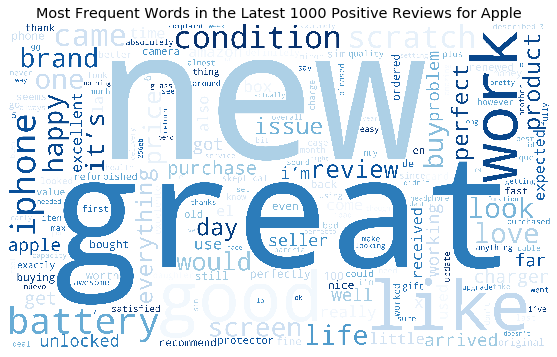

In [26]:
#Plot wordclouds for latest 1000 reviews for Apple
apple_pos = " ".join(apple[apple["positivity"]==1]["clean_text"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Apple")

If we check apple reviews that mention "new", they are most renewed phones - actually 96% of Apple reviews are for renewed iPhones that are sold on Amazon. Buyers are satisfied when they find their purchases are almost in the new condition.


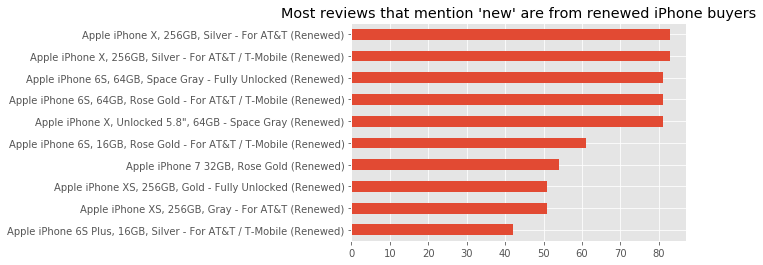

In [27]:
apple[apple["clean_text"].apply(lambda x: "new" in x)]["item_title"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most reviews that mention 'new' are from renewed iPhone buyers")
plt.show()

In [28]:
apple["renewed"] = apple["item_title"].apply(lambda x: ("Renewed" in x) | ("Reburshied" in x))
print("{0: 0.1%} iPhones that were sold on Amazon are renewed/reburshied.".format(apple["renewed"].sum() / len(apple["renewed"])))

 100.0% iPhones that were sold on Amazon are renewed/reburshied.


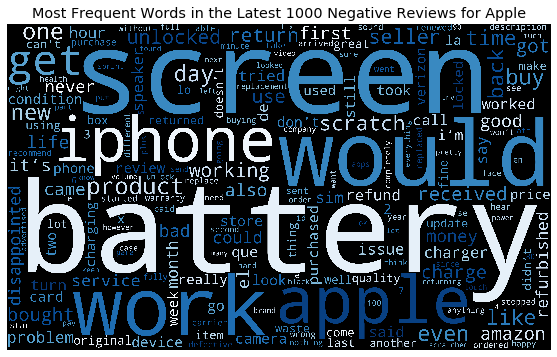

In [29]:
apple_neg = " ".join(apple[apple["positivity"]==-1]["clean_text"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

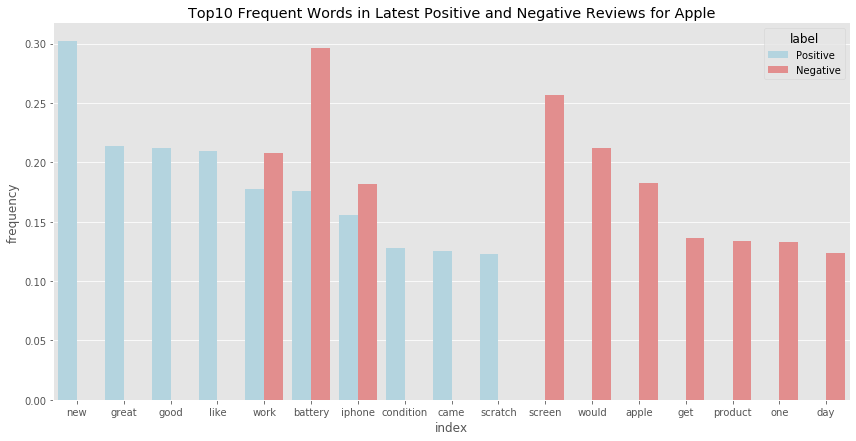

In [30]:
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(apple["positivity"]==1), 1000), 
                       min(sum(apple["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Apple", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)

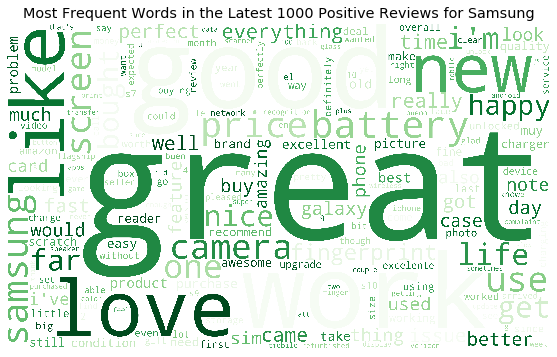

In [31]:
# Plot wordclouds for latest 1000 reviews for Samsung
samsung_pos = " ".join(samsung[samsung["positivity"]==1]["clean_text"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Samsung")

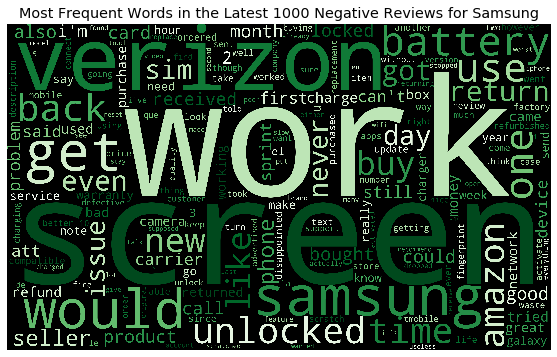

In [32]:
samsung_neg = " ".join(samsung[samsung["positivity"]==-1]["clean_text"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

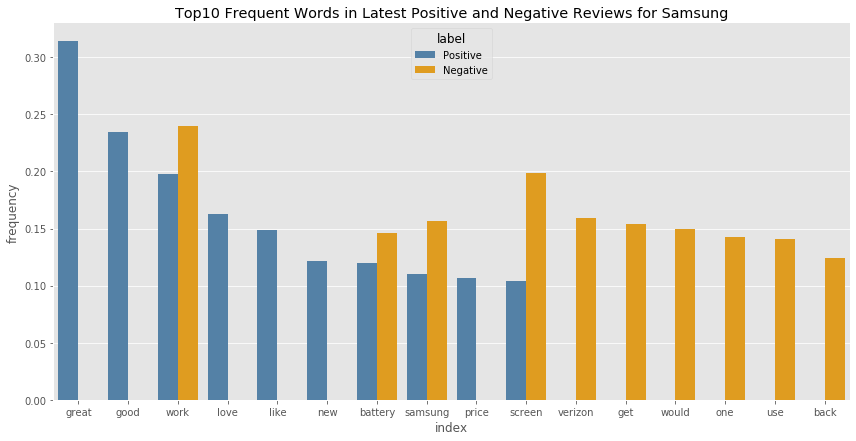

In [33]:
topn_wordfreq_bar_both(samsung_pos_word_freq, samsung_neg_word_freq, 
                       min(sum(samsung["positivity"]==1), 1000), 
                       min(sum(samsung["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)

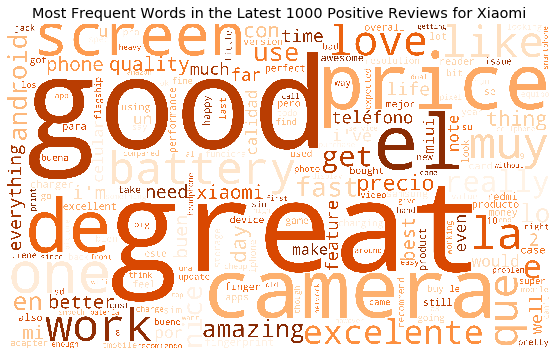

In [34]:
# 2.6 Plot wordclouds for latest 1000 reviews for Xiaomi
xiaomi_pos = " ".join(xiaomi[xiaomi["positivity"]==1]["clean_text"][0:1000])
xiaomi_pos_word_freq = word_freq_dict(xiaomi_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="white")
wordcloud_from_frequency(xiaomi_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Xiaomi")

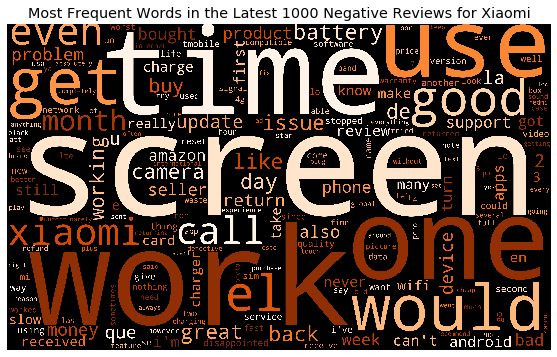

In [35]:
xiaomi_neg = " ".join(xiaomi[xiaomi["positivity"]==-1]["clean_text"][0:1000])
xiaomi_neg_word_freq = word_freq_dict(xiaomi_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="black")
wordcloud_from_frequency(xiaomi_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Xiaomi")

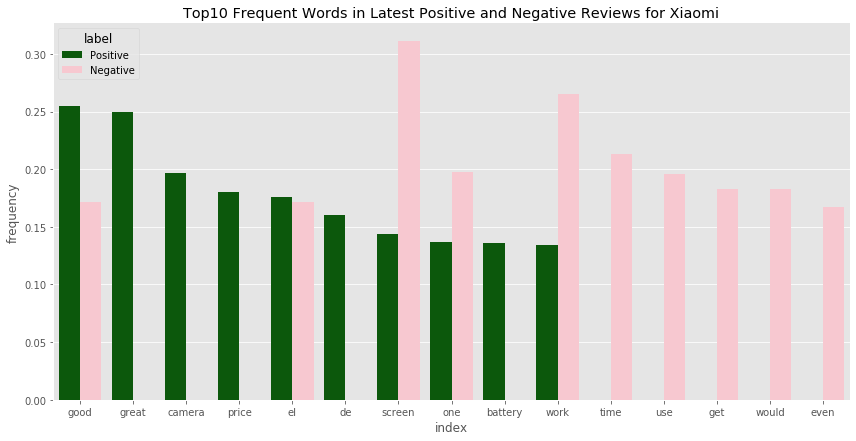

In [36]:
topn_wordfreq_bar_both(xiaomi_pos_word_freq, xiaomi_neg_word_freq, 
                       min(sum(xiaomi["positivity"]==1), 1000), 
                       min(sum(xiaomi["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Xiaomi", 
                       ["darkgreen", "pink"], 
                       height=6, aspect=2)

a

 # Vectorization and Topic Modelling

In [37]:
#  Vectorization and Topic Modelling
# Initialize TF-IDF vectorizer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")

For topic modelling we employ LDA model. 

In [38]:
# Initalize LDA model
from sklearn.decomposition import LatentDirichletAllocation
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [39]:
# Define a function to print LDA topics
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

In [40]:
# Run LDA model for Apple
t0 = time.time()
apple_tfidf = tfidf_vectorizer.fit_transform(apple["clean_text"])
apple_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(apple_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Apple.".format(n_topics))
print_topn_words(lda, apple_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Apple.
Topic #0: iphone perfect condition seller came got work screen day new
Topic #1: great love price condition product work time iphone new screen
Topic #2: like new brand came scratch work battery condition price look
Topic #3: work look bought great new like came scratch iphone battery
Topic #4: good far issue price condition battery came work look new
Topic #5: apple happy purchase new battery review iphone screen issue scratch
Topic #6: screen product scratch time battery refurbished work came like apple
Topic #7: unlocked buy refurbished review time look iphone work came bought
Topic #8: battery life problem got new work day great came scratch
Topic #9: working charger use day came far issue new bought great

Done in 46.867s.


The LDA topic modelling confirms our findings from the wordcloud:
* Apple buyers complain about battery life.
* If the buyer bought a refurbished iphone, he would pay particular attention to better health and screen condition.

In [42]:
# Run the model for Samsung
t0 = time.time()
samsung_tfidf = tfidf_vectorizer.fit_transform(samsung["clean_text"])
samsung_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(samsung_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Samsung.".format(n_topics))
print_topn_words(lda, samsung_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Samsung.
Topic #0: note issue time galaxy samsung ve day like screen new
Topic #1: card sim came new work verizon time use great like
Topic #2: love good need samsung price camera great new time use
Topic #3: like bought far buy camera used good samsung new time
Topic #4: battery life phone good day great use screen camera like
Topic #5: great really samsung price like time camera good love use
Topic #6: new price got problem like better time good great samsung
Topic #7: screen month samsung bought buy time problem day use need
Topic #8: product use verizon good time samsung work bought great buy
Topic #9: work fast great time new like problem good camera use

Done in 334.944s.


Samsung buyers are in general happy about the value-price combination. They also complained abbout battery life and screen condition.

In [43]:
# Run the model for Xiaomi
t0 = time.time()
xiaomi_tfidf = tfidf_vectorizer.fit_transform(xiaomi["clean_text"])
xiaomi_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(xiaomi_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Xiaomi.".format(n_topics))
print_topn_words(lda, xiaomi_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Xiaomi.
Topic #0: battery screen life camera great day good fast use quality
Topic #1: el la que lo muy en mi excelente xiaomi android
Topic #2: amazing muy price quality fast need camera phone thing better
Topic #3: like use best xiaomi phone better work issue price need
Topic #4: money really great good buy best better work like quality
Topic #5: great work excellent fast camera price buy quality using xiaomi
Topic #6: excelente nice en muy el la lo xiaomi really work
Topic #7: bought time day android work buy mi use good camera
Topic #8: love thing feature work fast price buy great using really
Topic #9: good price far quality feature really camera work nice screen

Done in 31.595s.


Consistent with the wordcloud, Xiaomi buyers show highest satisfaction about the quality especially the camera.


# Feature Importance for Sentiment Classification

The document-term matrix we obtain after running text vectorization can be used as a feature set. In the following example, we use it as the features to predict 

C:\Users\yuvra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


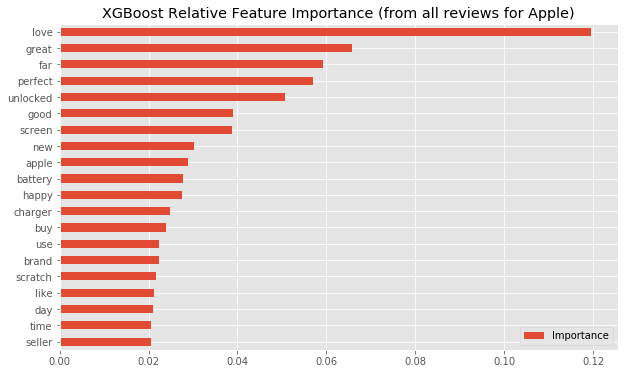

In [45]:
# Plot feature importance using XGBoost
#for Apple
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(apple_tfidf, apple["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=apple_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("XGBoost Relative Feature Importance (from all reviews for Apple)")
plt.show()

# Sentiment Analysis using VADER


In [57]:
# Filter English reviews
# Add language labels 
from langdetect import detect
def lang_detect(text):
    try:
        return detect(text)
    except:
        return None
import time
start_time = time.time()
reviews["lang"] = reviews["body"].apply(lang_detect)
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

It takes 837.4664931297302 seconds for the code to finish.


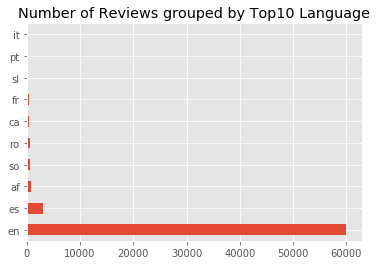

In [58]:
#Plot distribution of reviews into languages
reviews["lang"].value_counts()[:10].plot(kind="barh", title="Number of Reviews grouped by Top10 Language")
plt.show()

In [59]:
#  Only take English reviews
reviews = reviews[reviews["lang"]=="en"]

In [2]:
# Sentiment analysis using Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("The weather is nice today.")

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [3]:
analyzer.polarity_scores("The weather is bad today.")

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}

In [4]:
analyzer.polarity_scores("This product is very bad.")

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [6]:
analyzer.polarity_scores("wow the weather is very bad.")

{'neg': 0.327, 'neu': 0.345, 'pos': 0.328, 'compound': 0.0018}

In [61]:
#Create sentiment score columns
start_time = time.time()
reviews["body"] = reviews["body"].astype("str")
reviews["sent_neg"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
reviews["sent_neu"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
reviews["sent_pos"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
reviews["sent_comp"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

It takes 279.8595333099365 seconds for the code to finish.


In [62]:
#  Save the datasets into csv
reviews.to_csv("reviews_with_sentiment_scores.csv")

In [63]:
# After the steps above we will get a pre-proceessed dataset
reviews_en = pd.read_csv("reviews_with_sentiment_scores.csv")

In [8]:
import pandas as pd
reviews_en = pd.read_csv("reviews_with_sentiment_scores.csv")
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(reviews_en.shape))
reviews_en.head()

The dataset contains  59849 rows and  26 variables.


,Unnamed: 0,asin,name,rating,date,verified,title,body,helpfulVotes,brand,...,price,originalPrice,month,positivity,clean_text,lang,sent_neg,sent_neu,sent_pos,sent_comp
0,0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,...,0.0,0.0,2005-10-01,0,samsung a600 awhile absolute doo doo read revi...,en,0.080,0.816,0.105,0.8629
1,1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,...,0.0,0.0,2004-01-01,-1,due software issue nokia sprint phone's text m...,en,0.020,0.876,0.104,0.8860
2,2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,...,0.0,0.0,2003-12-01,1,great reliable also purchased samsung a460 die...,en,0.051,0.846,0.103,0.7992
3,3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,...,0.0,0.0,2004-03-01,0,love really need one expect price bill receive...,en,0.000,0.844,0.156,0.9592
4,4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,...,0.0,0.0,2005-08-01,1,great every purpose offer except day bought it...,en,0.066,0.814,0.121,0.7745


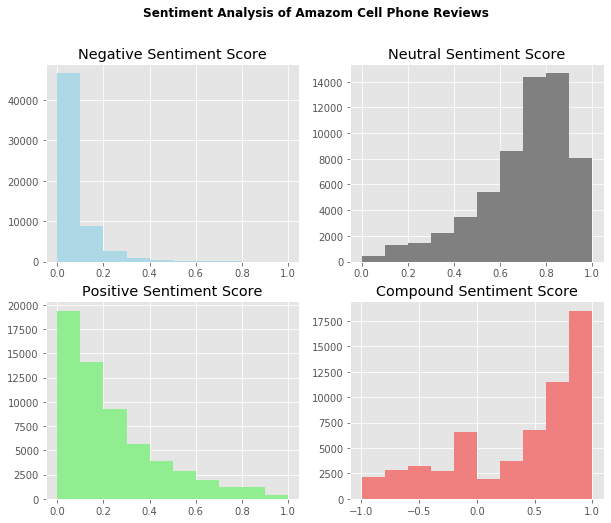

In [64]:
# Plot the distribution of sentiment scores
plt.figure()

plt.subplot(2, 2, 1)
reviews_en["sent_neg"].hist(figsize=(10, 8), color="lightblue")
plt.title("Negative Sentiment Score")
plt.subplot(2, 2, 2)
reviews_en["sent_neu"].hist(figsize=(10, 8), color="grey")
plt.title("Neutral Sentiment Score")
plt.subplot(2, 2, 3)
reviews_en["sent_pos"].hist(figsize=(10, 8), color="lightgreen")
plt.title("Positive Sentiment Score")
plt.subplot(2, 2, 4)
reviews_en["sent_comp"].hist(figsize=(10, 8), color="lightcoral")
plt.title("Compound Sentiment Score")

plt.suptitle('Sentiment Analysis of Amazom Cell Phone Reviews', fontsize=12, fontweight='bold');

plt.show()

The charts show that the majority of the reviews are positive (i.e. compound score > 0). 

The correlation coefficient between sentiment score (compound) and rating is  0.6044 with a p-value of  0.0000.


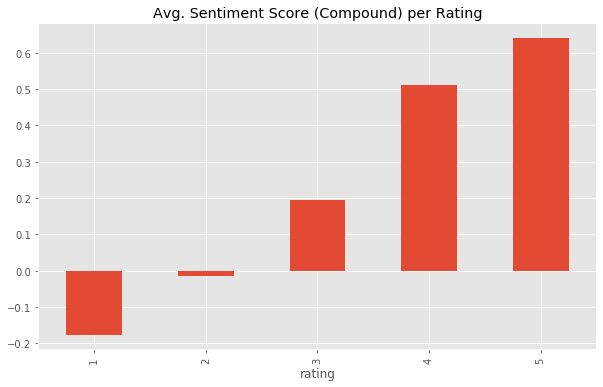

In [65]:
#Check the correlation between sentiment score (compound) and rating
import numpy as np
import scipy.stats as stats
print("The correlation coefficient between sentiment score (compound) and rating is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(reviews_en["rating"], reviews_en["sent_comp"])))
reviews_en.groupby("rating").mean()["sent_comp"].plot(kind="bar", figsize=(10, 6))
plt.title("Avg. Sentiment Score (Compound) per Rating")
plt.show()

There is a strong correlation between the sentiment score derived by VADER and the actual rating from the reviewers. The VADER model proves to be a very powerful tool for sentiment classification.